# Lecture 9: Symbolic computation

__Authors:__
- David Klemmer
- Sean Tulin

__Objectives:__

By the end of this lesson, you will be able to:

- Use the __SymPy__ library to perform symbolic computations, including basic algebraic manipulations, matrix manipulation, and calculus

## Introduction to SymPy

SymPy is a Python library that is used to make symbolic computations. It provides similar functionality as Mathematica, Maple, and Matlab, but with the advantage that SymPy is free. Symbolic manipulation is not only used in research, but can be very helpful in your coursework to check theoretical calculations.

This tutorial will give you a quick introduction to different functionalities of SymPy: 
- Defining variables and functions
- Calculus of functions (differentiation and integration)
- Solving ordinary differential equations 
- Algebraic and matrix manipulations
- Defining tensors

For more information, we refer the reader to the (highly recommended and well-written) [official documentation](https://docs.sympy.org/latest/index.html). In particular, examples here only cover *real*-valued computations. For complex analysis, see the documentation.



## Getting started

First, we import the SymPy library. (We will also use `numpy` and `matplotlib.pyplot` in the examples below.)

The next step is to define the variables we will use for our calculations to follow. Here we use $t, x, y, z$.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t, x, y, z = sp.symbols("t x y z")

With these variables, we can define mathematical expressions. SymPy has many [elementary functions](https://docs.sympy.org/latest/modules/functions/elementary.html) that are built-in and from which more complicated functions can be constructed.

For example, let's define a function

$$
f(x)=\cos(x)+1 
$$

In SymPy, this is defined as follows.

In [2]:
f = sp.cos(x) + 1

f

cos(x) + 1

We can replace or substitute one variable by another. For example, say we want to replace $x \to y$ in the above expression, yielding

$$
f(x) \to f(y) = \cos(y) + 1
$$

This is accomplished by substitution as follows.

In [3]:
f.subs(x, y)

cos(y) + 1

We can use this feature to evaluate a function at a given point. For example, suppose we want to calculate $f(0)$:

$$
f(x=0)=\cos(0)+1=2
$$

We perform a substitution replacing $x \to 0$, as follows.

In [4]:
f.subs(x, 0)

2

We can also perform a more complicated substitution to replace $x$ by *a function*. 
For example, let's replace $x$ by a function of $y,z$, i.e., $x \to y z^2$. That is, we want:

$$
f(x) \to f(y z^2) = cos(yz^2)+1
$$



In [5]:
f.subs(x, y * z**2)

cos(y*z**2) + 1

Note that these operations do not change the definition of `f` itself. If you want to save the results of your symbolic manipulation, you need to use a definition.

In [6]:
print(f) # Still the original f

g = f.subs(x,y * z**2)
print(g)

cos(x) + 1
cos(y*z**2) + 1


## Converting to numerical functions

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the **lambdify** function. 

To convert our symbolic function $f(x)$ to a numerical one, we do the following:

```py
f_num = sp.lambdify(x,f)
```

Note that we need pass our symbolic function `f` as well as the variable that will be evaluated numerically, namely $x$. Now, we have a numerical function `f_num` that can be evaluated numerically in the same way as you would normally do.

In [7]:
f_num = sp.lambdify(x, f)

Now, let's define an array of $x$ values and evaluate the function at those values numerically.

In [8]:
x_arr = np.arange(0., 10.5, 0.5) 

f_num(x_arr)

array([2.        , 1.87758256, 1.54030231, 1.0707372 , 0.58385316,
       0.19885638, 0.0100075 , 0.06354331, 0.34635638, 0.7892042 ,
       1.28366219, 1.70866977, 1.96017029, 1.97658763, 1.75390225,
       1.34663532, 0.85449997, 0.3979881 , 0.08886974, 0.00282784,
       0.16092847])

SymPy also includes a built-in function `sp.pprint()` that can provide a nicer output.

In [9]:
sp.pprint(f_num(x_arr))

[2.         1.87758256 1.54030231 1.0707372  0.58385316 0.19885638
 0.0100075  0.06354331 0.34635638 0.7892042  1.28366219 1.70866977
 1.96017029 1.97658763 1.75390225 1.34663532 0.85449997 0.3979881 
                 0.08886974 0.00282784 0.16092847]                


We can plot these numerical values in the usual way.

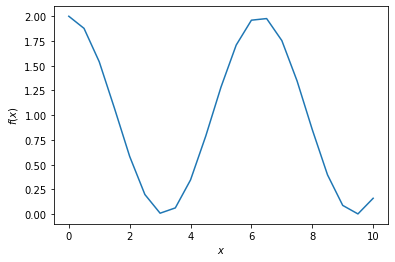

In [10]:
plt.plot(x_arr, f_num(x_arr))
plt.xlabel(r"$x$")
plt.ylabel(r'$f(x)$')
plt.show()

## Algebraic manipulations

SymPy has a built-in function `sp.simplify()` that can simplify mathematical expressions. For example, we can show that


$$\cos^2(x)+\sin^2(x)=1$$


In [11]:
expr = sp.cos(x)**2 + sp.sin(x)**2

sp.simplify(expr)

1

As another example, we can perform this simplification:

$$
\frac{x^3-5x}{x^2+xy}=\frac{x}{x}\frac{x^2-5}{x+y}=\frac{x^2-5}{x+y}
$$



In [12]:
expr = (x**3 - 5 * x) / (x**2 + y * x)

sp.simplify(expr)

(x**2 - 5)/(x + y)

SymPy can expand a polynomial with `sp.expand()`. Take the following example:


$$
(x+y)^3=x^3+3x^2y+3y^2x+y^3
$$



In [13]:
poly = (x + y)**3

expanded_poly = sp.expand(poly)

expanded_poly

x**3 + 3*x**2*y + 3*x*y**2 + y**3

SymPy can factorize a polynomial with `sp.factor()`. From the previous example, we have:


In [14]:
sp.factor(expanded_poly)

(x + y)**3

## Differentiation

SymPy can compute derivatives of functions. Consider the example

$$
\frac{\text{d}}{\text{d}t} \cos(t) = -\sin(t)
$$

In SymPy, this is done as follows using `sp.diff(f,t)` where `f` is the function we want to differentiate with respect to `t`.

In [15]:
sp.diff(sp.cos(t), t) 

-sin(t)

Differentiation can also be performed using the syntax `f.diff(t)`. Consider this example:

$$
\frac{\text{d}}{\text{d}t} \cos^2(t) =-2\sin(t)\cos(t)
$$

We can perform this as:

In [16]:
f = sp.cos(t)**2

f.diff(t)

-2*sin(t)*cos(t)

For taking a higher-order derivative, the syntax is `f.diff(t,n)` where `n` is the number of derivatives taken with respect to `t`. As an example, suppose we want to compute


$$
\frac{\text{d}^2}{\text{d}t^2} \cos^2(t) = 2 (\sin^2(t)-\cos^2(t))
$$



In [17]:
f.diff(t, 2)

2*(sin(t)**2 - cos(t)**2)

Of course, this is equivalent to taking two first derivatives.

In [18]:
f.diff(t).diff(t)

2*sin(t)**2 - 2*cos(t)**2

For multivariate functions, the same function `diff` can take partial derivatives, including higher-order derivatives with respect to different variables.

For example, we consider the function $f(t,x) = (t + x)^3$ and we will show that

$$
\frac{\partial^2f}{\partial t\partial x}=\frac{\partial^2f}{\partial x \partial t}
$$



In [19]:
f = (t+x)**3

# Derive first with respect to t, then wrt x
f.diff(t, x) 

6*(t + x)

In [20]:
# Derive first wrt x, then wrt t
f.diff(x, t)

6*(t + x)

## Integration

There are two kinds of integrals: definite and indefinite. To calculate the indefinite integral (i.e., primitive of a function)

$$\int f(t) \; \text{d}t$$

we use the syntax `sp.integrate(f,t)` where `f` is the function and `t` is the integration variable. As an example, let's compute

$$
\int\cos(t) \; \text{d}t=\sin(t)
$$



In [21]:
sp.integrate(sp.cos(t), t)

sin(t)

Next, we compute a definite integral. The syntax is `sp.integrate(f,(t,a,b))` to compute

$$\int_a^b f(t) \; \text{d}t$$

As an example, we can compute

$$
\int^\infty_0 \text{e}^{-t}\text{d}t
$$

In [22]:
sp.integrate(sp.exp(-t), (t, 0, np.infty))

1

Similar to differentiation, there is an alternative syntax form where `integrate` is called directly as a method of the function itself, `f.integrate(t)`. As an example, we compute 

$$
\int \text{e}^{-t} \; \text{d}t=-\text{e}^{-t}
$$

In [23]:
f = sp.exp(-t)

f.integrate(t)

-exp(-t)

Here is an example that does not converge:

$$
\int^\infty_{-\infty}\text{e}^{-t}\text{d}t
$$


In [24]:
f.integrate((t, -np.infty, np.infty))

oo

Next, we turn to multivariate integrales. For example, we calculate the volume of a sphere of radius $r$ by performing a triple integral

$$
V=\int^r_{0} \text{d}r' \int^\pi_{0} \text{d}\theta \int^{2\pi}_{0} \text{d}\varphi  \,  r'^2 \sin(\theta) \,    =\frac{4}{3}\pi r^3
$$



In [25]:
# First define new variables for spherical coordinates
r, rprime, theta, phi = sp.symbols("r, r', \theta, \phi")

# Define integrand
integrand = rprime**2 * sp.sin(theta)

# Perform integral
V = integrand.integrate((rprime, 0, r), (phi, 0, 2*sp.pi), (theta, 0, sp.pi))

V

4*pi*r**3/3

By substituting a given value for the radius, we get the value for a physical volume. For example, taking $r=1$ gives the volume of the unit sphere.


In [26]:
unit_sphere = V.subs(r,1) # r = 1
unit_sphere

4*pi/3

We can convert the exact value into a numerical value using the method `evalf()`.

In [27]:
unit_sphere.evalf()

4.18879020478639

## Ordinary differential equations

Next, we can see how to solve ordinary differential equations (ODEs). Here we consider ODEs that can be expressed in the form

$$
a_0(t) f(t)+a_1(t) \frac{\text{d}f(t)}{\text{d}t}+...+a_n(t)\frac{\text{d}^n f(t)}{\text{d}t^n}+b(t)=0
$$

where $f(t)$ is the function we want to solve for and $a_i(t) \, \forall i \in [0, n]$ and $b(t)$ are arbitrary differentiable functions.

The steps are as follows. 

1. Define the symbol `f` to be a function (as opposed to a symbolic variable). This is done as follows, determines that the symbol `f` belongs to the class of the functions.

```py
y = symbols("y", cls=Function)
```

2. Define the ODE. This is done by defining an equation using `sp.Eq(L,R)`, which represents the equations $L = R$.

3. Solve the ODE using `sp.dsolve()`.

Let's show all the steps for the simple ODE

$$
\frac{\text{d}f(t)}{\text{d}t}-f(t)=0
$$




In [28]:
# Define the function
f = sp.symbols("f", cls=sp.Function) 

# Define the ODE
ODE = sp.Eq(f(t).diff(t) - f(t), 0)

# Solve the ODE
sp.dsolve(ODE, f(t))

Eq(f(t), C1*exp(t))

Here is another example, which is a 2nd-order ODE, the simple harmonic oscillator:

$$
\frac{\text{d}^2f(t)}{\text{d}t^2}+\omega_0^2f(t)=0
$$

Remember if you have a constant symbolic parameter in your ODE, you must first define it as a `symbol`.

In [29]:
omega = sp.symbols("\omega_0")

ODE = sp.Eq(f(t).diff(t, 2) + omega**2 * f(t), 0)

sp.dsolve(ODE, f(t))

Eq(f(t), C1*exp(-I*\omega_0*t) + C2*exp(I*\omega_0*t))

<span style='font-size:x-large'>Matrix manipulation with SymPy:</span>


## Matrix manipulation

First, we define a matrix:


In [30]:
M = sp.Matrix([[1, 2], [3, 4]]) 

M

Matrix([
[1, 2],
[3, 4]])

We can get the individual entries of a matrix using the usual syntax for array indexing and slicing. For example, `M[i,j]` is the entry in the $i$th row and $j$th column, and `M[:,i]` is the $i$th column. As usual in Python, counting indices starts at $0$.


In [31]:
# First row
row = M[0, :]
row

Matrix([[1, 2]])

In [32]:
# Second element of first row
row[1]

2

In [33]:
# Or more directly
M[0, 1] 

2

You can define a column matrix (or column vector):


In [34]:
c = sp.Matrix([x, y])
c

Matrix([
[x],
[y]])

And a row matrix (or row vector):

In [35]:
r = sp.Matrix([[x, y]])
r

Matrix([[x, y]])

To multiply matrices, you can use the `*` symbol. Here are some examples:


In [36]:
M * M

Matrix([
[ 7, 10],
[15, 22]])

In [37]:
r * c # This is a single number

Matrix([[x**2 + y**2]])

In [38]:
c * r # This is a 2x2 matrix

Matrix([
[x**2,  x*y],
[ x*y, y**2]])

Other matrix operations are as follows:


In [39]:
M + M # matrix addition

Matrix([
[2, 4],
[6, 8]])

In [40]:
sp.Transpose(M) # transposition

Matrix([
[1, 2],
[3, 4]]).T

If you want to see it explicitly, you should use the method `as_explicit()`:

In [41]:
sp.Transpose(M).as_explicit()

Matrix([
[1, 3],
[2, 4]])

In [42]:
sp.det(M) # Determinant

-2

In [43]:
sp.det(sp.Transpose(M)) # Determinant of the transpose

-2

In [44]:
M.inv() # Inverse of a matrix

Matrix([
[ -2,    1],
[3/2, -1/2]])

We can check that a matrix multiplied by its inverse is the identity matrix.

In [45]:
M.inv() * M 

Matrix([
[1, 0],
[0, 1]])

We can compute the eigenvalues and eigenvectors of a matrix. The method `eigenvals()` returns the eigenvalues and the multiplicity of each eigenvalue. (For the example here, the multiplicity is always 1.) 

The method `eigenvects()` additionally returns the eigenvectors (as column vectors). 

Here are some examples.

In [46]:
M.eigenvals()

{5/2 - sqrt(33)/2: 1, 5/2 + sqrt(33)/2: 1}

In [47]:
M.eigenvects()

[(5/2 - sqrt(33)/2,
  1,
  [Matrix([
   [-2/(-3/2 + sqrt(33)/2)],
   [                     1]])]),
 (5/2 + sqrt(33)/2,
  1,
  [Matrix([
   [-2/(-sqrt(33)/2 - 3/2)],
   [                     1]])])]

## General Relativity and tensor algebra

Einstein's theory of General Relativity (GR) is described in terms of many different tensors. Here we will show how SymPy can be useful for algebraic computations involving tensors, which in GR can be somewhat complicated and tedious to work out by hand.

What are tensors? They are objects with components labeled by indices. You are familiar with one-index objects (vectors) and two-index objects (matrices), but there can be more complicated objects with even more indices to label their components.

Tensor algebra is the process of multiplying tensors together by multiplying their components along certain axes. Familiar examples include the inner product (dot product) between vectors and usual matrix multiplication. 

To begin, we define a spacetime vector to include time $t$ along with the usual three Cartesian spatial directions

$$
x^\mu=(t, x, y, z)
$$

Here, $\mu$ is the index and takes values $\mu = 0, 1, 2, 3$, i.e., $x^0 = t$, $x^1 = x$, etc. Even though $x^\mu$ is strictly-speaking the *component* of the vector, it is customary to refer to $x^\mu$ as the vector itself.

### Matrix algebra with the metric tensor

The fundamental object in GR is the metric tensor $g_{\mu\nu}$, which describes the curvature of spacetime. Since it has two indices, we can represent it as a matrix. Here we will assume the metric tensor can be written as the following matrix.

$$
g_{\mu\nu}=\left(\begin{array}{rrr} 
1 & 0 & 0 & 0 \\ 
0 & -f^2(t) & 0 & 0 \\ 
0 & 0 & -f^2(t) & 0 \\ 
0 & 0 & 0 & -f^2(t) \\ 
\end{array}\right)
$$

This form is useful for cosmology to describe a homogenous and isotropic expanding Universe.

The metric tensors encodes the geometry of the curved manifold of spacetime. This is often expressed in terms of the spacetime distance (squared) $ds^2$ between two nearby spacetime points, $x^\mu = (t,x,y,z)$ and $x^\mu + dx^\mu= (t + dt,x + dx,y + dy,z + dz)$:

$$
ds^2 = g_{\mu\nu} dx^\mu dx^\nu=dt^2-f^2(t)(dx^2+dy^2+dz^2)
$$

In GR, tensors with upper and lower indices are different objects. An upper index is refered to as a *covariant* index, while a lower index is a *contravariant* index. 
To convert one to another (referred to as *raising* or *lowering* indices), we multiply with the metric tensor. That is, we multiply by $g_{\mu \nu}$ to lower an index and $g^{\mu \nu}$ to raise an index. Since raising and then lowering (or vice-versa) gives back the original, $g_{\mu \nu}$ and $g^{\mu \nu}$ must be matrix inverses of one another.





In [48]:
# Metric tensor g_{mu nu} with two lower indices (denoted ll)

g_ll = sp.Matrix([[1, 0, 0, 0],[0, -f(t)**2, 0, 0],[0, 0, -f(t)**2, 0],[0, 0, 0, -f(t)**2]])
g_ll

Matrix([
[1,        0,        0,        0],
[0, -f(t)**2,        0,        0],
[0,        0, -f(t)**2,        0],
[0,        0,        0, -f(t)**2]])

In [49]:
# Metric tensor g^{mu nu} with two upper indices (denoted uu)
# Take the inverse

g_uu = g_ll.inv()
g_uu

Matrix([
[1,          0,          0,          0],
[0, -1/f(t)**2,          0,          0],
[0,          0, -1/f(t)**2,          0],
[0,          0,          0, -1/f(t)**2]])

We can easily check that these matrices are inverses by (matrix) multiplying them together. We get the $4 \times 4$ identity matrix.

In [50]:
g_uu * g_ll

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

For other tensor calculations, we need a more general approach beyond matrix multiplication. 

First, we have a general __tensor product__ `sp.tensorproduct()`. This multiplies *all* the different elements of two tensors in *all* possible ways. For example, $g_{\mu \nu}$ has $4 \times 4$ components and $g^{\alpha \beta}$ has $4 \times 4$ components (we need unique labels for the indices here). So the tensor product

$$g_{\mu \nu} g^{\alpha \beta}$$

is an object with four indices that has $4 \times 4 \times 4 \times 4$ components.

In [51]:
# Tensor product with yield a 4 x 4 x 4 x 4 component object.

prod = sp.tensorproduct(g_ll, g_uu)
prod

[[[[1, 0, 0, 0], [0, -1/f(t)**2, 0, 0], [0, 0, -1/f(t)**2, 0], [0, 0, 0, -1/f(t)**2]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]], [[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[-f(t)**2, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]], [[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[-f(t)**2, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]], [[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[-f(t)**2, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]]]

Next, we have __tensor contraction__. In the example above, suppose we set the indices $\nu = \alpha$ and sum over $\nu$:

$$\sum_{\nu = 0}^{3} g_{\mu \nu} g^{\nu \beta}$$

Now, this is nothing more than the usual matrix multiplication. 

We are left with two free indices, $\mu$ and $\beta$, so this object is another $4 \times 4$ matrix. Since summing over indices reduces the number of free indices left, this is referred to as *contracting indices*.

Here is a bit of important notation. It is customary to omit the summation sign and write the above as 

$$g_{\mu \nu} g^{\nu \beta}$$

with the understanding that *repeated* indices (one raised, one lowered) are summed over, known as __Einstein's summation convention__.

We can perform this operation using `sp.tensorcontraction()`. First, we compute the tensor product as above. Then we contract the second index ($\nu$) and third index ($\alpha$) with each other. For the above example, we have

```py 
prod = sp.tensorproduct(g_ll, g_uu)
sp.tensorcontraction(prod, (1, 2)) 
```

Here `(1,2)` labels the indices to contract, i.e., the second and third indices since as usual Python counting starts at 0. 

In this example, we again yield the identity matrix. 

In [52]:
# Tensor contraction

prod = sp.tensorproduct(g_ll, g_uu)
sp.tensorcontraction(prod, (1, 2)) 

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

The contravariant metric times the covariant metric should give us the four dimensional unit matrix.
$$ g^{\mu\alpha}g_{\alpha\nu}=\delta^\mu_\nu=\left(\begin{array}{rrr} 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
\end{array}\right)$$



### Raising and lowering indices

The covariant form of the spacetime position vector is $x^\mu = (t,x,y,z)$. The contravariant form is obtained by multiplying with the metric tensor to lower the index. That is,

$$
x_\mu=g_{\mu\nu}x^\nu
$$

Note that the repeated index $\nu$ is summed over according to Einstein's summation convention (i.e., there is $\sum_{\nu=0}^3$ omitted in front). This operation is just a $4 \times 4$ matrix multiplying a $4$-component vector to yield another $4$-component vector.

Similarly, raising an index is accomplished by

$$
x^\mu=g^{\mu\nu} x_\nu
$$

In this way, indices are raised and lowered by contracting with the metric tensor. Let's see how to perform these operations.

In [53]:
# Define x with upper index (u)

x_u = sp.Array([t, x, y, z]) 
x_u

[t, x, y, z]

In [54]:
# Compute x with lower index (l)

# Step 1: compute tensor product
prod = sp.tensorproduct(g_ll, x_u) 

# Step 2: contraction
x_l = sp.tensorcontraction(prod, (1, 2))
x_l

[t, -x*f(t)**2, -y*f(t)**2, -z*f(t)**2]

Performing the same steps to raise the index returns the original position vector.

In [55]:
prod = sp.tensorproduct(g_uu, x_l) 
sp.tensorcontraction(prod, (1, 2))

[t, x, y, z]

Tensor products can be arbitrarily complicated. For example, we have the product of three metric tensors, which is as object with *six* indices.

$$
g^{\alpha\beta}g_{\gamma\mu}g_{\delta\nu}
$$

If we contract $\alpha = \gamma$ (the first and third indices) and $\beta = \delta$ (the second and fourth indices), we have

$$g^{\alpha\beta}g_{\alpha\mu}g_{\beta\nu} = g_{\mu\nu}$$

That is, we start with $g^{\alpha \beta}$ and lower two indices using the metric tensor twice. 
We can check that this works explicitly.

In [56]:
prod = sp.tensorproduct(g_uu, g_ll, g_ll)
sp.tensorcontraction(prod, (0, 2), (1,4))

[[1, 0, 0, 0], [0, -f(t)**2, 0, 0], [0, 0, -f(t)**2, 0], [0, 0, 0, -f(t)**2]]

This is the same as the metric tensor with two lower indices, given above.

In [57]:
g_ll

Matrix([
[1,        0,        0,        0],
[0, -f(t)**2,        0,        0],
[0,        0, -f(t)**2,        0],
[0,        0,        0, -f(t)**2]])

### Derivatives of tensors

In GR, tensors are not fixed numbers in general but are *functions* of spacetime coordinates. That is, the components of a tensor can be functions of $t,x,y,z$. For example, in our discussion above, we assumed that the metric tensor was a function of $t$.

Here we consider derivatives of tensors. In general, one needs to consider all partial derivatives 

$$\frac{\partial}{\partial x^\mu} = \left( \frac{\partial}{\partial t}, \frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z} \right)$$

This is often abbreviated as $\partial_\mu$. 

Here, since we only introduce dependence on time $t$, we need only consider time derivatives $\partial/\partial t$. This is often abbreviated as $\partial_0$ or $\partial_t$. Other derivatives $\partial_x$, $\partial_y$, $\partial_z$ will yield zero.

As an example, let's take the derivative of the metric tensor

$$\partial_\alpha g_{\mu \nu}$$

We have three indices, so we will get a 3-index object back. All of the components with $\alpha \ne 0$ will be zero.

In [58]:
g_ll.diff(x_u) # the metric only depends on t, so all derivatives by x, y or z are 0

[[[0, 0, 0, 0], [0, -2*f(t)*Derivative(f(t), t), 0, 0], [0, 0, -2*f(t)*Derivative(f(t), t), 0], [0, 0, 0, -2*f(t)*Derivative(f(t), t)]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]]

If we just want the time derivative, we can compute $\partial_t g_{\mu\nu}$ in two equivalent ways (i.e., setting $\alpha = 0$).





In [59]:
g_ll.diff(x_u[0])

Matrix([
[0,                           0,                           0,                           0],
[0, -2*f(t)*Derivative(f(t), t),                           0,                           0],
[0,                           0, -2*f(t)*Derivative(f(t), t),                           0],
[0,                           0,                           0, -2*f(t)*Derivative(f(t), t)]])

In [60]:
g_ll.diff(t)

Matrix([
[0,                           0,                           0,                           0],
[0, -2*f(t)*Derivative(f(t), t),                           0,                           0],
[0,                           0, -2*f(t)*Derivative(f(t), t),                           0],
[0,                           0,                           0, -2*f(t)*Derivative(f(t), t)]])

We can also compute a second derivative, e.g., $\partial_t^2 g_{\mu\nu}$



In [61]:
g_ll.diff(x_u[0], 2)

Matrix([
[0,                                                           0,                                                           0,                                                           0],
[0, -2*(f(t)*Derivative(f(t), (t, 2)) + Derivative(f(t), t)**2),                                                           0,                                                           0],
[0,                                                           0, -2*(f(t)*Derivative(f(t), (t, 2)) + Derivative(f(t), t)**2),                                                           0],
[0,                                                           0,                                                           0, -2*(f(t)*Derivative(f(t), (t, 2)) + Derivative(f(t), t)**2)]])